<a href="https://colab.research.google.com/github/JUN0-LEE/mini-MLpiscine/blob/master/(Keras)multi_class_classification_of_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2017 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classifying Handwritten Digits with Neural Networks

![img](https://www.tensorflow.org/versions/r0.11/images/MNIST.png)

**Learning Objectives:**
  * Train both a linear model and a neural network to classify handwritten digits from the classic [MNIST](http://yann.lecun.com/exdb/mnist/) data set
  * Compare the performance of the linear and neural network classification models
  * Visualize the weights of a neural-network hidden layer

Our goal is to map each input image to the correct numeric digit. We will create a NN with a few hidden layers and a Softmax layer at the top to select the winning class.

## Setup

First, let's download the data set, import TensorFlow and other utilities, and load the data into a *pandas* `DataFrame`. Note that this data is a sample of the original MNIST training data; we've taken 20000 rows at random.

In [0]:
# install TensorFlow 2.0
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 200kB/s 
     |████████████████████████████████| 501kB 42.7MB/s 
     |████████████████████████████████| 3.1MB 39.6MB/s 
  Found existing installation: tensorflow 1.14.0rc1
    Uninstalling tensorflow-1.14.0rc1:
      Successfully uninstalled tensorflow-1.14.0rc1


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Import data

Let's import data.

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
class_names = ['zero','one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

## Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [0]:
x_train.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [0]:
len(y_train)

60000

Each label is an integer between 0 and 9:

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [0]:
x_test.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [0]:
len(y_test)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

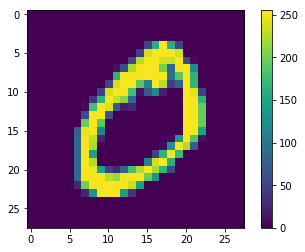

In [0]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

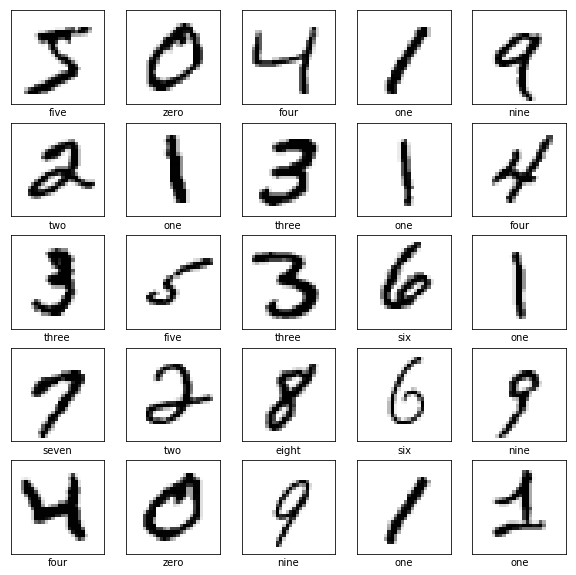

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as [tf.keras.layers.Dense](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense), have parameters that are learned during training.

In [0]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two [tf.keras.layers.Dense](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [0]:
model.fit(x_train,
          y_train,
          epochs=10,
          callbacks=[tf.keras.callbacks.TensorBoard(log_dir='multi-class_classification')])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1100 - accuracy: 0.9663
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1078 - accuracy: 0.9666
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1050 - accuracy: 0.9672
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1039 - accuracy: 0.9664
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1018 - accuracy: 0.9680
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0967 - accuracy: 0.9689
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0941 - accuracy: 0.9704
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0943 - accuracy: 0.9698
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0908 - accuracy: 0.9708
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.97 (or 97%) on the training data.

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print '\nTest accuracy:', test_acc

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0812 - accuracy: 0.9785

Test accuracy: 0.9785


From time to time, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions
With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(x_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
predictions[0]

array([4.7981299e-15, 1.6337065e-10, 5.5651701e-09, 7.2425887e-06,
       9.4088135e-21, 5.1981219e-10, 6.1386025e-25, 9.9999273e-01,
       3.1118450e-12, 2.1950909e-10], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [0]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [0]:
y_test[0]

7

We can graph this to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

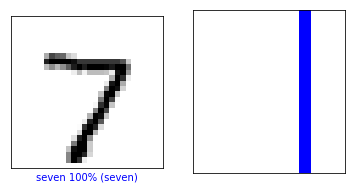

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

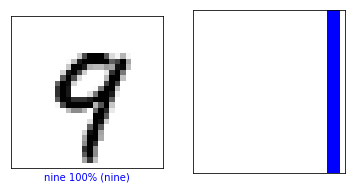

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

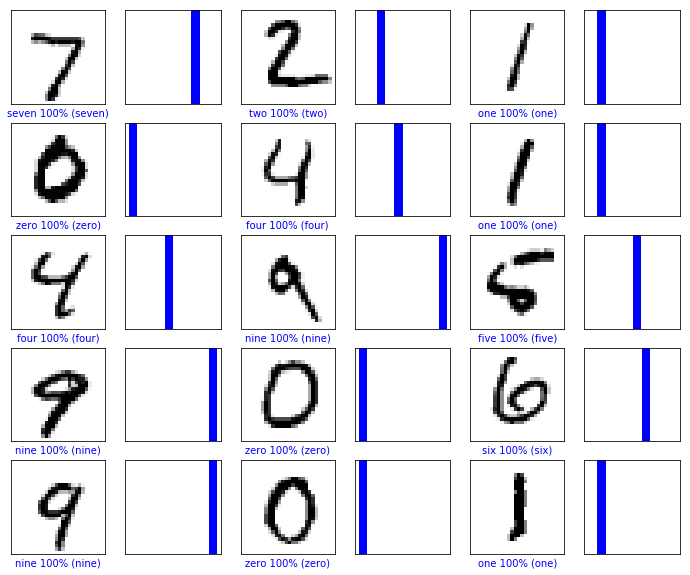

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [0]:
# Grab an image from the test dataset.
img = x_test[0]

print(img.shape)

(28, 28)


[tf.keras](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras) models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.7981481e-15 1.6337065e-10 5.5651701e-09 7.2425819e-06 9.4088135e-21
  5.1981219e-10 6.1386025e-25 9.9999273e-01 3.1118389e-12 2.1950868e-10]]


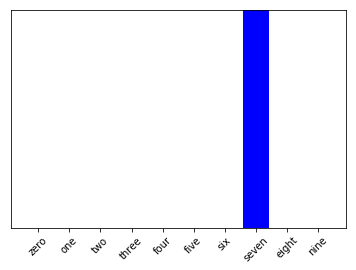

In [0]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [0]:
np.argmax(predictions_single[0])

7

And, as before, the model predicts a label of 7.